
Building Logistic Regression model with k-fold cross-validation...

Loading fold data and training models...

Fold 1/5:
  Training set: X=(41290, 4), y=(41290,)
  Test set: X=(10323, 4), y=(10323,)
  Training logistic regression model (C=1.0, penalty=l2, solver=liblinear)...
  Results for fold 1:
    Accuracy:  0.6911
    Precision: 0.6591
    Recall:    0.0877
    F1 Score:  0.1548
    AUC:       0.5990
    Confusion Matrix:
[[6842  151]
 [3038  292]]

Fold 2/5:
  Training set: X=(41290, 4), y=(41290,)
  Test set: X=(10323, 4), y=(10323,)
  Training logistic regression model (C=1.0, penalty=l2, solver=liblinear)...
  Results for fold 2:
    Accuracy:  0.6909
    Precision: 0.6613
    Recall:    0.0856
    F1 Score:  0.1516
    AUC:       0.5966
    Confusion Matrix:
[[6847  146]
 [3045  285]]

Fold 3/5:
  Training set: X=(41290, 4), y=(41290,)
  Test set: X=(10323, 4), y=(10323,)
  Training logistic regression model (C=1.0, penalty=l2, solver=liblinear)...
  Results for fold 3:
    A

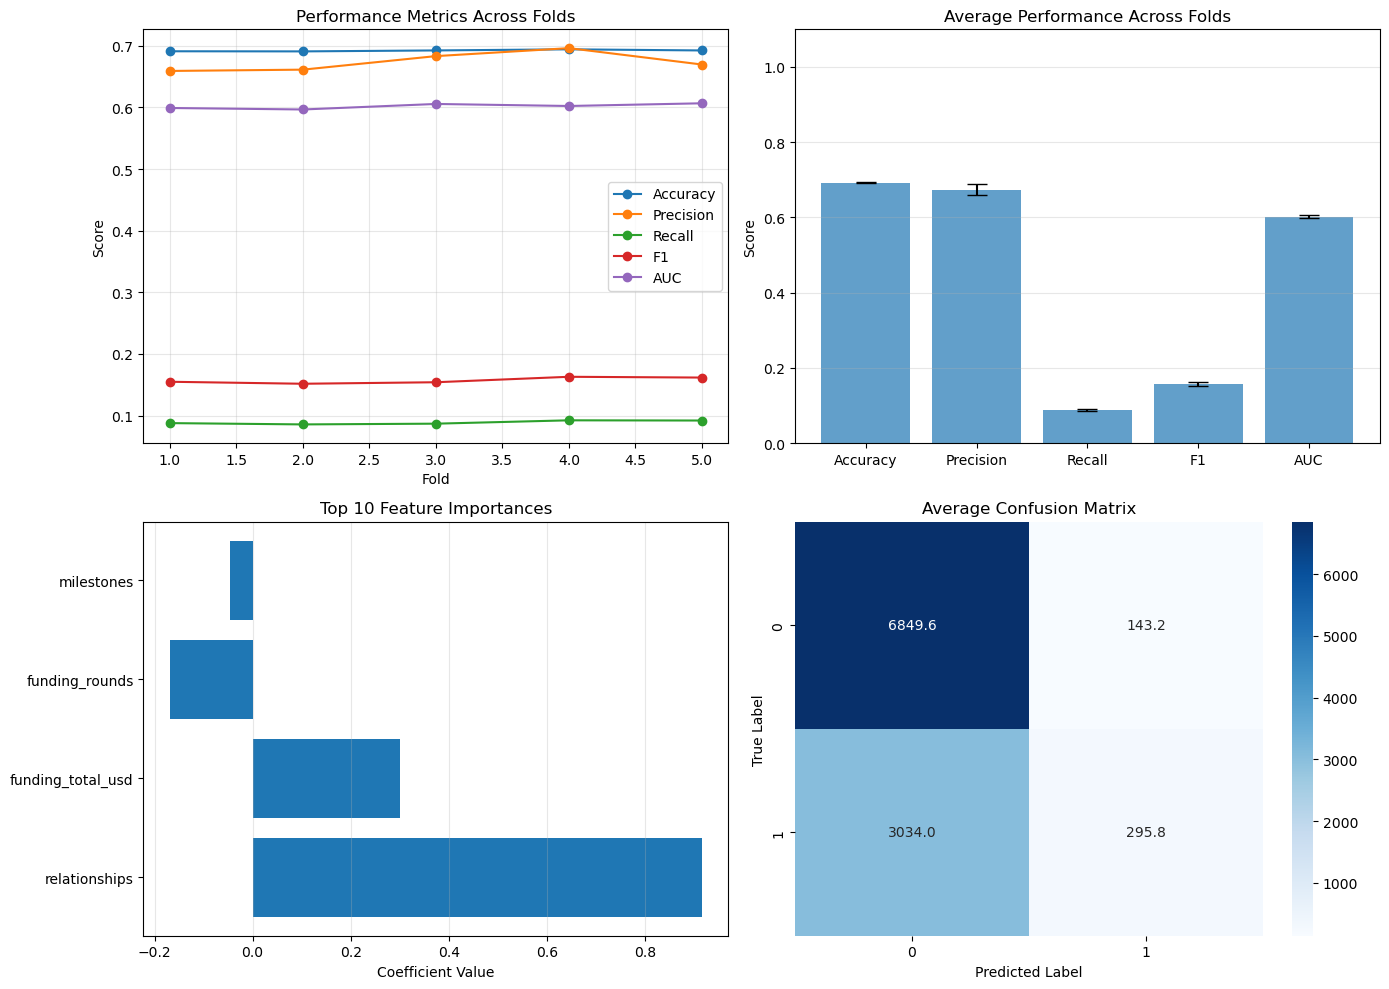

In [4]:
# Build Logistic Regression model with k-fold cross-validation
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

print("\nBuilding Logistic Regression model with k-fold cross-validation...")

# Define the output directory
output_dir = '/Users/aminosaurier/Downloads/spring_2025_startup_survival/new-analysis-relationships-0/'

n_folds = 5

# Initialize lists to store results
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
fold_aucs = []
confusion_matrices = []
models = []

# Hyperparameters for logistic regression
C_value = 1.0  # Regularization strength (inverse)
penalty = 'l2'  # Regularization type
solver = 'liblinear'  # Algorithm to use

print("\nLoading fold data and training models...")

# For each fold
for fold in range(n_folds):
    print(f"\nFold {fold+1}/{n_folds}:")
    
    # Load training and testing data for this fold
    X_train = pd.read_csv(f'{output_dir}X_train_fold{fold+1}.csv')
    X_test = pd.read_csv(f'{output_dir}X_test_fold{fold+1}.csv')
    
    # Load target variables
    try:
        y_train = pd.read_csv(f'{output_dir}y_train_fold{fold+1}.csv')
        y_test = pd.read_csv(f'{output_dir}y_test_fold{fold+1}.csv')
        
        # Check if y_train and y_test are DataFrames with multiple columns
        if len(y_train.columns) > 1:
            y_train = y_train.iloc[:, 0]
        else:
            y_train = y_train.iloc[:, 0]
            
        if len(y_test.columns) > 1:
            y_test = y_test.iloc[:, 0]
        else:
            y_test = y_test.iloc[:, 0]
            
    except Exception as e:
        print(f"Error loading target data: {e}")
        raise
    
    print(f"  Training set: X={X_train.shape}, y={y_train.shape}")
    print(f"  Test set: X={X_test.shape}, y={y_test.shape}")
    
    # Create and train the logistic regression model
    print(f"  Training logistic regression model (C={C_value}, penalty={penalty}, solver={solver})...")
    model = LogisticRegression(C=C_value, penalty=penalty, solver=solver, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Calculate AUC if we have probability predictions
    try:
        auc = roc_auc_score(y_test, y_pred_proba)
    except:
        auc = float('nan')
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)
    fold_aucs.append(auc)
    confusion_matrices.append(cm)
    models.append(model)
    
    # Print metrics for this fold
    print(f"  Results for fold {fold+1}:")
    print(f"    Accuracy:  {accuracy:.4f}")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall:    {recall:.4f}")
    print(f"    F1 Score:  {f1:.4f}")
    print(f"    AUC:       {auc:.4f}")
    print(f"    Confusion Matrix:\n{cm}")
    
    # Save the model
    with open(f'{output_dir}logreg_model_fold{fold+1}.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Save predictions
    pd.DataFrame({'y_true': y_test, 'y_pred': y_pred, 'y_pred_proba': y_pred_proba}).to_csv(
        f'{output_dir}logreg_predictions_fold{fold+1}.csv', index=False)

# Calculate average performance across folds
avg_accuracy = np.mean(fold_accuracies)
avg_precision = np.mean(fold_precisions)
avg_recall = np.mean(fold_recalls)
avg_f1 = np.mean(fold_f1s)
avg_auc = np.mean(fold_aucs)

std_accuracy = np.std(fold_accuracies)
std_precision = np.std(fold_precisions)
std_recall = np.std(fold_recalls)
std_f1 = np.std(fold_f1s)
std_auc = np.std(fold_aucs)

# Print aggregate results
print("\nAggregate Results Across All Folds:")
print(f"  Accuracy:  {avg_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"  Precision: {avg_precision:.4f} ± {std_precision:.4f}")
print(f"  Recall:    {avg_recall:.4f} ± {std_recall:.4f}")
print(f"  F1 Score:  {avg_f1:.4f} ± {std_f1:.4f}")
print(f"  AUC:       {avg_auc:.4f} ± {std_auc:.4f}")

# Visualize the results
plt.figure(figsize=(14, 10))

# Plot 1: Performance metrics across folds
plt.subplot(2, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
values = [fold_accuracies, fold_precisions, fold_recalls, fold_f1s, fold_aucs]
for i, (metric, vals) in enumerate(zip(metrics, values)):
    plt.plot(range(1, n_folds+1), vals, marker='o', linestyle='-', label=metric)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Folds')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Average performance metrics with error bars
plt.subplot(2, 2, 2)
avg_values = [avg_accuracy, avg_precision, avg_recall, avg_f1, avg_auc]
std_values = [std_accuracy, std_precision, std_recall, std_f1, std_auc]
plt.bar(metrics, avg_values, yerr=std_values, capsize=7, alpha=0.7)
plt.ylabel('Score')
plt.title('Average Performance Across Folds')
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1.1)

# Plot 3: Feature importance (coefficients) - average across folds
plt.subplot(2, 2, 3)
feature_names = X_train.columns
avg_coefs = np.zeros(len(feature_names))
for model in models:
    avg_coefs += model.coef_[0]
avg_coefs /= n_folds

# Sort coefficients by absolute magnitude
sorted_idx = np.argsort(np.abs(avg_coefs))[::-1]
top_features = 10  # Show top features
sorted_idx = sorted_idx[:min(top_features, len(sorted_idx))]

plt.barh(range(len(sorted_idx)), avg_coefs[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Coefficient Value')
plt.title(f'Top {top_features} Feature Importances')
plt.grid(True, alpha=0.3, axis='x')

# Plot 4: Average confusion matrix
plt.subplot(2, 2, 4)
avg_cm = np.mean(confusion_matrices, axis=0)
sns.heatmap(avg_cm, annot=True, fmt='.1f', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix')

plt.tight_layout()
plt.savefig(f'{output_dir}logistic_regression_results.png', dpi=300)
print(f"\nResults visualization saved to {output_dir}logistic_regression_results.png")

# Save the aggregate results to a CSV file
results_df = pd.DataFrame({
    'Fold': list(range(1, n_folds+1)) + ['Average', 'Std Dev'],
    'Accuracy': fold_accuracies + [avg_accuracy, std_accuracy],
    'Precision': fold_precisions + [avg_precision, std_precision],
    'Recall': fold_recalls + [avg_recall, std_recall],
    'F1_Score': fold_f1s + [avg_f1, std_f1],
    'AUC': fold_aucs + [avg_auc, std_auc]
})
results_df.to_csv(f'{output_dir}logistic_regression_results.csv', index=False)
print(f"Results saved to {output_dir}logistic_regression_results.csv")

print("\nLogistic Regression with k-fold cross-validation completed successfully!")

In [ ]:
# This code:

# Loads each fold's training and test data created in your previous cells
# Builds a logistic regression model for each fold
# Evaluates model performance on each fold using multiple metrics:
#   Accuracy, precision, recall, F1 score, AUC
#   Confusion matrices
# Calculates and displays average performance across all folds
# Visualizes the results with 4 plots:
#   Performance across folds
#   Average performance with error bars
#   Feature importances (model coefficients)
#   Average confusion matrix
# Saves the models, predictions, visualizations and results to files


Generating ROC and Precision-Recall curves for all folds...
Curves saved to /Users/aminosaurier/Downloads/spring_2025_startup_survival/new-analysis-relationships-0/roc_pr_curves.png

ROC AUC scores across folds:
  Fold 1: 0.5990
  Fold 2: 0.5966
  Fold 3: 0.6056
  Fold 4: 0.6023
  Fold 5: 0.6067
  Mean: 0.6020 ± 0.0038

Average Precision scores across folds:
  Fold 1: 0.4497
  Fold 2: 0.4454
  Fold 3: 0.4539
  Fold 4: 0.4495
  Fold 5: 0.4518
  Mean: 0.4501 ± 0.0028


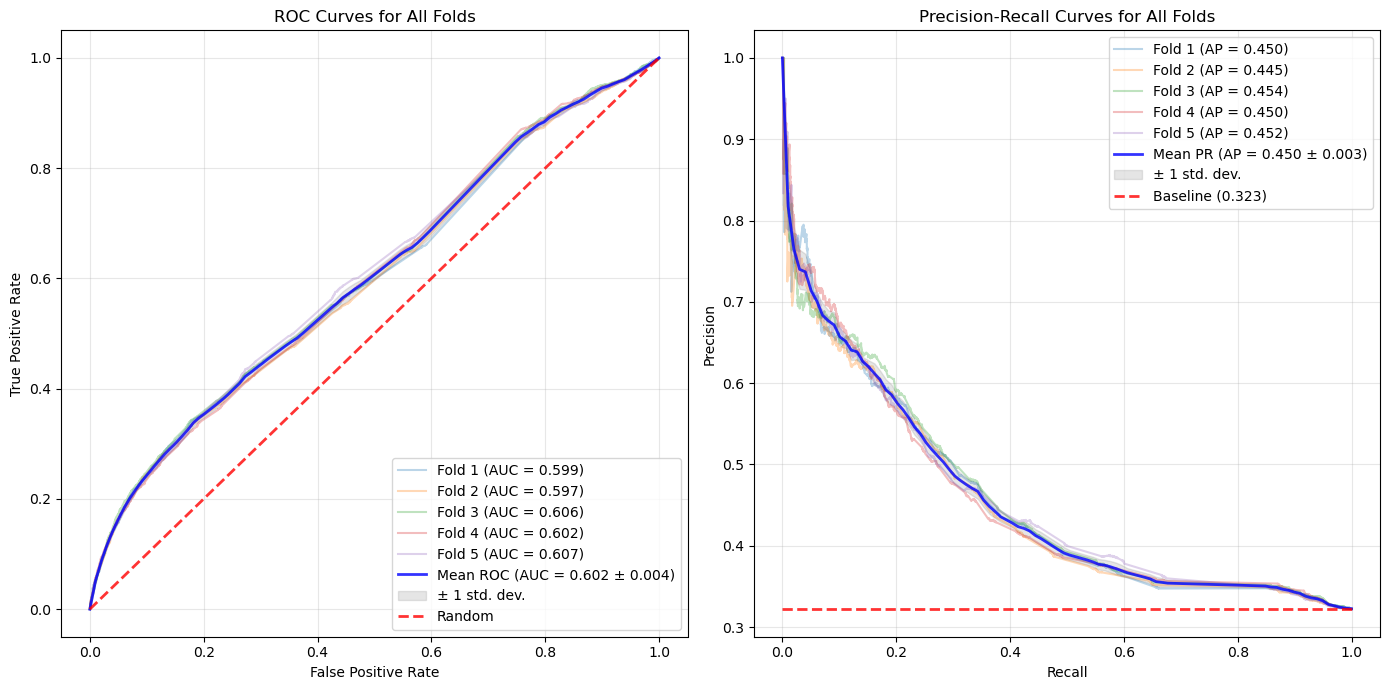

In [5]:
# Plotting ROC curves and Precision-Recall curves for all k-folds
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

print("\nGenerating ROC and Precision-Recall curves for all folds...")

plt.figure(figsize=(14, 7))

# Plot for ROC Curves
plt.subplot(1, 2, 1)
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

for fold in range(n_folds):
    # Load predictions for this fold
    predictions = pd.read_csv(f'{output_dir}logreg_predictions_fold{fold+1}.csv')
    y_true = predictions['y_true']
    y_pred_proba = predictions['y_pred_proba']
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Interpolate TPR values at the standard FPR points
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    # Plot ROC curve for this fold
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {fold+1} (AUC = {roc_auc:.3f})')

# Plot average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.3f} ± {std_auc:.3f})', 
         lw=2, alpha=0.8)

# Plot standard deviation area
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label=f'± 1 std. dev.')

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random')

# Finalize ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Folds')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Plot for Precision-Recall Curves
plt.subplot(1, 2, 2)
mean_recall = np.linspace(0, 1, 100)
precisions = []
avg_precisions = []

for fold in range(n_folds):
    # Load predictions for this fold
    predictions = pd.read_csv(f'{output_dir}logreg_predictions_fold{fold+1}.csv')
    y_true = predictions['y_true']
    y_pred_proba = predictions['y_pred_proba']
    
    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = average_precision_score(y_true, y_pred_proba)
    avg_precisions.append(pr_auc)
    
    # Reverse the arrays because np.interp requires increasing x-values
    precision = precision[::-1]
    recall = recall[::-1]
    
    # Interpolate precision values at standard recall points
    interp_precision = np.interp(mean_recall, recall, precision)
    precisions.append(interp_precision)
    
    # Plot PR curve for this fold
    plt.plot(recall[::-1], precision[::-1], alpha=0.3, label=f'Fold {fold+1} (AP = {pr_auc:.3f})')

# Calculate and plot average Precision-Recall curve
mean_precision = np.mean(precisions, axis=0)
mean_ap = np.mean(avg_precisions)
std_ap = np.std(avg_precisions)
plt.plot(mean_recall, mean_precision, color='b', 
         label=f'Mean PR (AP = {mean_ap:.3f} ± {std_ap:.3f})', lw=2, alpha=0.8)

# Plot standard deviation area
std_precision = np.std(precisions, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)
plt.fill_between(mean_recall, precisions_lower, precisions_upper, color='grey', alpha=0.2, 
                 label=f'± 1 std. dev.')

# Calculate baseline (no skill) based on class distribution
baseline = np.mean([np.mean(pd.read_csv(f'{output_dir}y_test_fold{fold+1}.csv').iloc[:, 0]) for fold in range(n_folds)])
plt.plot([0, 1], [baseline, baseline], linestyle='--', lw=2, color='r', 
         alpha=0.8, label=f'Baseline ({baseline:.3f})')

# Finalize Precision-Recall plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Folds')
plt.legend(loc="best")
plt.grid(alpha=0.3)

# Save the figure
plt.tight_layout()
plt.savefig(f'{output_dir}roc_pr_curves.png', dpi=300)
print(f"Curves saved to {output_dir}roc_pr_curves.png")

# Summarize the curve metrics
print("\nROC AUC scores across folds:")
for fold, auc_value in enumerate(aucs):
    print(f"  Fold {fold+1}: {auc_value:.4f}")
print(f"  Mean: {mean_auc:.4f} ± {std_auc:.4f}")

print("\nAverage Precision scores across folds:")
for fold, ap_value in enumerate(avg_precisions):
    print(f"  Fold {fold+1}: {ap_value:.4f}")
print(f"  Mean: {mean_ap:.4f} ± {std_ap:.4f}")

plt.show()